# Decision Tree

A Decision Tree is a widely used non-parametric supervised learning algorithm used for both classification and regression tasks. Its structure is intuitive and mimics human decision-making logic, making it a popular choice in various fields such as finance, medicine, and machine learning.

## Concept and Structure
A decision tree is a tree-like model that acts as a flowchart-like structure where each internal node represents a "test" or "question" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from the root to the leaf represent classification rules.

## Key Characteristics
**Hierarchical Structure** Starting from a root node, the data is split according to certain decision criteria. Each internal node corresponds to a decision that splits the data based on certain conditions.

**Interpretability:** One of the strengths of decision trees is their transparency and ease of interpretation. They can be visualized and understood by people without statistical background.

**Binary or Multi-way Splits:** Trees can use two-way (binary) splits or multi-way splits. Binary trees are most common, but the number of splits can be adjusted according to the nature of the data.



## Classification Tree
**Decision Tree Classification:** Used when the output variable is categorical. The tree splits based on reducing the impurity in the data subsets.

## Application

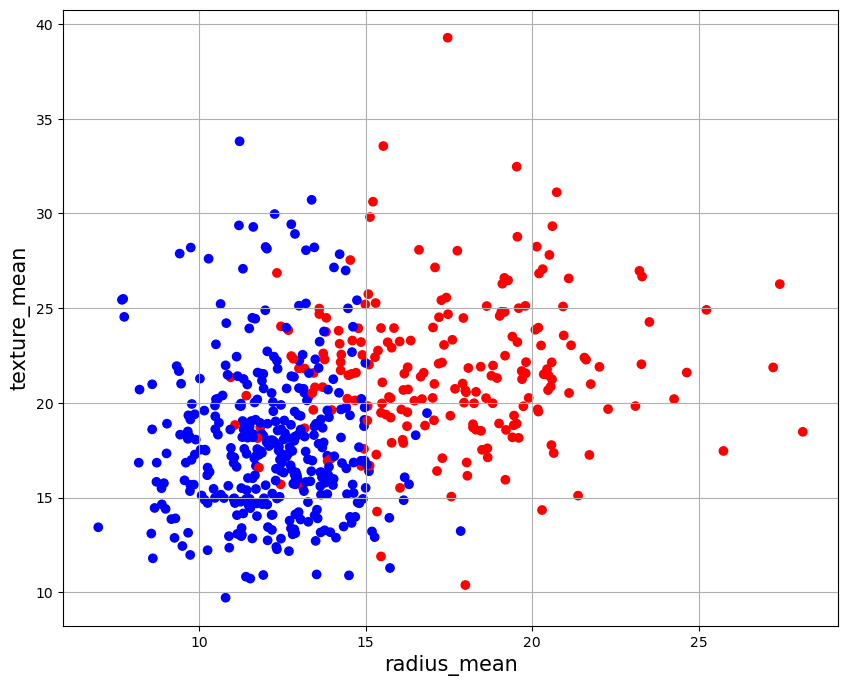

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Load the dataset
df = pd.read_csv("Cancer_Detection.csv")

X = df[['radius_mean', 'texture_mean']].values  # Replace with your actual feature column names
y = df['diagnosis']  # Replace with your actual target column name

colors = ["red" if label == "M" else "blue" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("radius_mean", fontsize=15)
plt.ylabel("texture_mean", fontsize=15)
plt.grid(True)
plt.show()


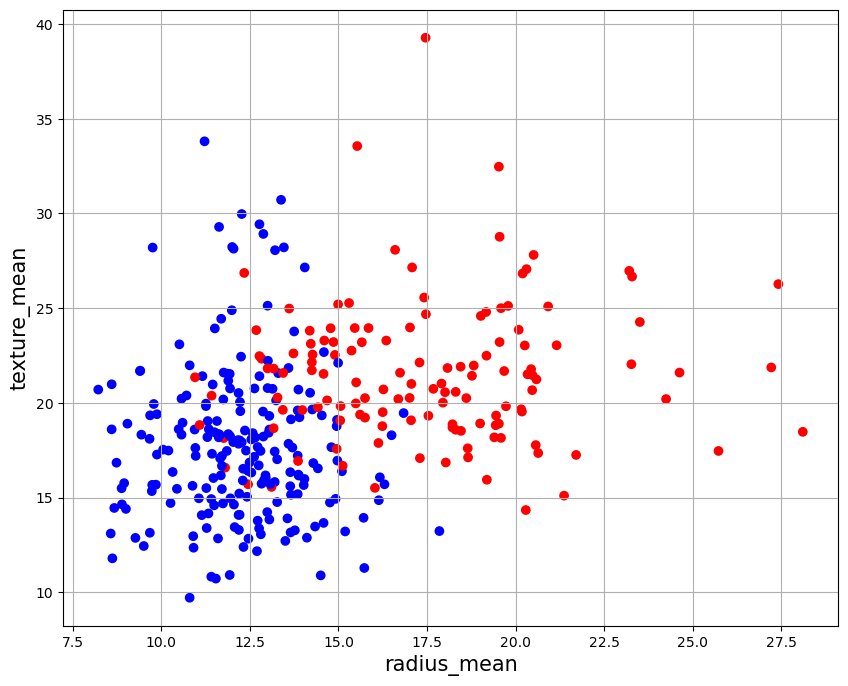

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == "M" else "blue" for label in y_train]
c_test = ["red" if label == "M" else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- radius_mean <= 15.02
|   |--- texture_mean <= 19.61
|   |   |--- texture_mean <= 15.53
|   |   |   |--- class: B
|   |   |--- texture_mean >  15.53
|   |   |   |--- texture_mean <= 15.58
|   |   |   |   |--- class: M
|   |   |   |--- texture_mean >  15.58
|   |   |   |   |--- radius_mean <= 11.03
|   |   |   |   |   |--- class: B
|   |   |   |   |--- radius_mean >  11.03
|   |   |   |   |   |--- radius_mean <= 11.19
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- radius_mean >  11.19
|   |   |   |   |   |   |--- texture_mean <= 15.70
|   |   |   |   |   |   |   |--- radius_mean <= 13.05
|   |   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |   |--- radius_mean >  13.05
|   |   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |   |--- texture_mean >  15.70
|   |   |   |   |   |   |   |--- radius_mean <= 14.88
|   |   |   |   |   |   |   |   |--- radius_mean <= 11.83
|   |   |   |   |   |   |   |   |   |--- radius_mean <= 11.74
|   |   |   |  

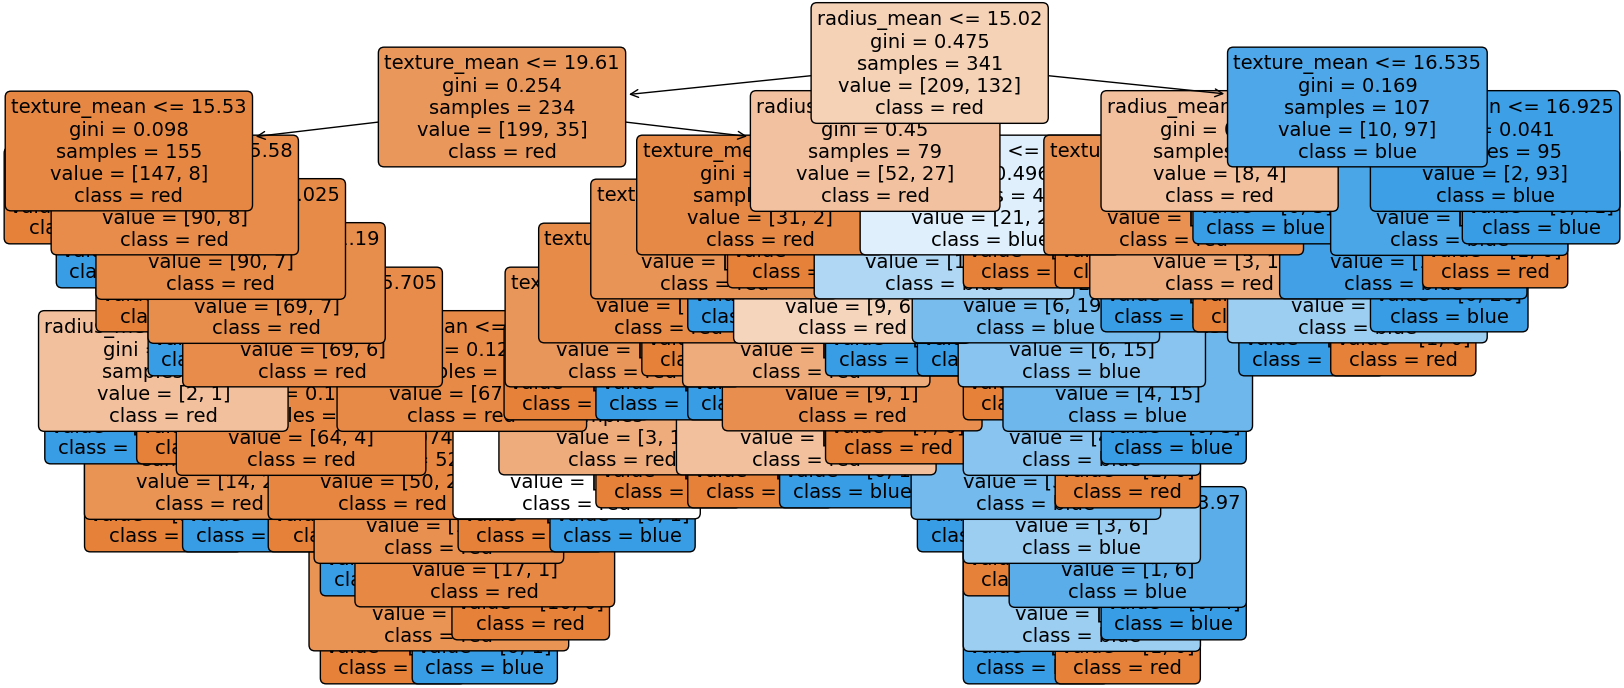

In [7]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["radius_mean", "texture_mean"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["radius_mean", "texture_mean"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

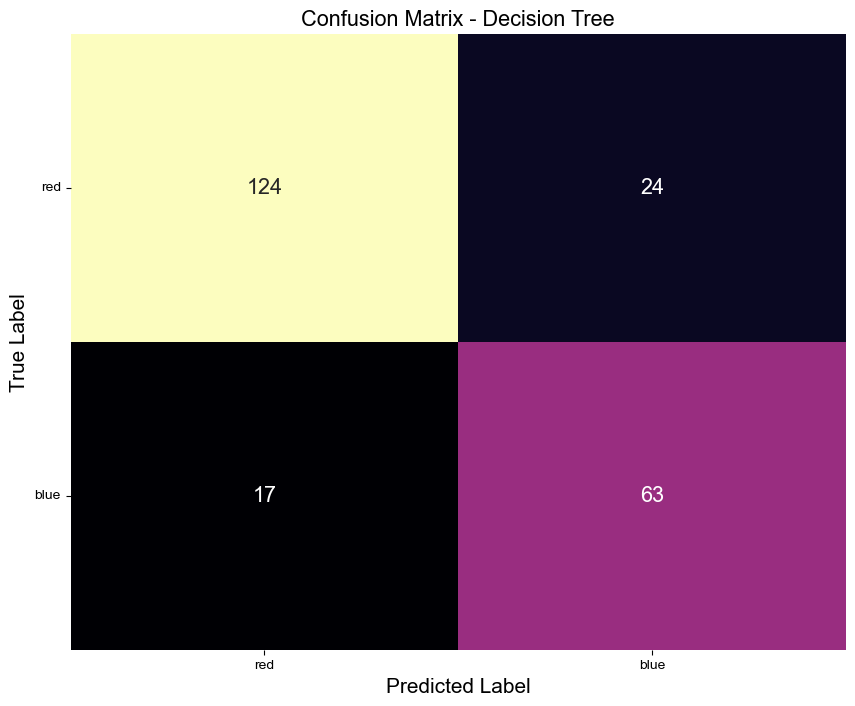

In [14]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [15]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.88      0.84      0.86       148
           M       0.72      0.79      0.75        80

    accuracy                           0.82       228
   macro avg       0.80      0.81      0.81       228
weighted avg       0.82      0.82      0.82       228



## Regression Trees

**Decision Tree Regression:** Used for continuous output variables. The splits are based on reducing the variance within the data subsets.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("possum.csv")

In [42]:
df.head(10)

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0
5,1,Vic,f,1.0,93.1,54.8,90.5,35.5
6,1,Vic,m,2.0,95.3,58.2,89.5,36.0
7,1,Vic,f,6.0,94.8,57.6,91.0,37.0
8,1,Vic,f,9.0,93.4,56.3,91.5,37.0
9,1,Vic,f,6.0,91.8,58.0,89.5,37.5


In [43]:
df = df.dropna()

In [44]:
X = df[['head_l', 'skull_w','total_l','tail_l']]
y = df["age"]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=44)

In [58]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 44)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 44)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 1.857973338541743 

MSE reg2: 4.064516129032258 



In [59]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 1.857973338541743 

MSE reg2: 3.838709677419355 



## Advantages

Easy to understand and interpret.

Can handle both numerical and categorical data.

Requires little data preprocessing – no need for dummy variables.

## Disadvantages

Prone to overfitting, especially with a lot of features.

Can become unstable because small variations in data might result in a completely different tree.

Biased with imbalanced datasets.